In [84]:
import matplotlib.pyplot as plt
import mne
import pandas as pd

12


The sampling rate is 1 kHz and the EEG corresponding to a music clip is 20 s long (the duration of the clips).

* sub-01_task-run1_channels.tsv
* sub-01_task-run1_eeg.edf
* sub-01_task-run1_eeg.json
* sub-01_task-run1_events.json
* sub-01_task-run1_events.tsv

In [33]:
participant_info = pd.read_csv('data/ds002721-download/participants.tsv', delimiter='\t')

In [46]:
channels = pd.read_csv('data/ds002721-download/sub-01/eeg/sub-01_task-run2_channels.tsv', delimiter='\t')

In [47]:
eeg_meta = pd.read_json('data/ds002721-download/sub-01/eeg/sub-01_task-run2_eeg.json', typ='series')

In [48]:
events = pd.read_csv('data/ds002721-download/sub-01/eeg/sub-01_task-run2_events.tsv', delimiter='\t')

In [49]:
events_info  = pd.read_json('data/ds002721-download/sub-01/eeg/sub-01_task-run2_events.json')

In [50]:
participant_info

,participant_id,age,sex
0,sub-01,31,M
1,sub-02,29,F
2,sub-03,39,F
3,sub-04,49,F
4,sub-05,23,F
5,sub-06,63,M
6,sub-07,34,M
7,sub-08,29,F
8,sub-09,36,F
9,sub-10,29,F


In [51]:
channels

,name,type,units,status,status_description
0,FP1,EEG,microV,good,NaN
1,FP2,EEG,microV,good,NaN
2,F7,EEG,microV,good,NaN
3,F3,EEG,microV,good,NaN
4,Fz,EEG,microV,good,NaN
5,F4,EEG,microV,good,NaN
6,F8,EEG,microV,good,NaN
7,T3,EEG,microV,good,NaN
8,C3,EEG,microV,good,NaN
9,Cz,EEG,microV,good,NaN


In [52]:
eeg_meta

TaskName                        Run
SamplingFrequency              1000
SoftwareFilters                 n/a
EEGChannelCount                  19
ECGChannelCount                   0
EEGReference          placed on FCz
PowerLineFrequency               50
dtype: object

In [53]:
events

,onset,duration,trial_type
0,2.449,20,263
1,2.689,20,786
2,2.817,20,257
3,3.713,20,257
4,5.689,20,788
...,...,...,...
710,563.203,20,807
711,563.303,20,32768
712,572.623,20,805
713,572.623,20,841


In [54]:
events_info.T

,LongName,Description
257,artifact:EOG,"artifact:EOG (blinks, fast, large amplitude)"
259,artifact:EMG/Muscle,artifact:EMG/Muscle
263,artifact:50/60 Hz mains interference,artifact:50/60 Hz mains interference
786,Cross on screen,Fixation cross displayed on screen
788,Music played,Start of music play
301-360,Music stimuli,The piece of music that was played. To identif...
800,Question 01,Question 01 presented to user (The music made ...
801,Question 02,Question 02 presented to user (The music made ...
802,Question 03,Question 03 presented to user (The music made ...
803,Question 04,Question 04 presented to user (The music made ...


In [59]:
raw = mne.io.read_raw_edf('data/ds002721-download/sub-01/eeg/sub-01_task-run2_eeg.edf', preload=True)

Extracting EDF parameters from /Users/josiah/dsi/data/ds002721-download/sub-01/eeg/sub-01_task-run2_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 573999  =      0.000 ...   573.999 secs...


<ipython-input-59-24cfa883e4b6>:1: RuntimeWarning: Invalid date encountered (2014-00-00 00:00:00).
  raw = mne.io.read_raw_edf('data/ds002721-download/sub-01/eeg/sub-01_task-run2_eeg.edf', preload=True)


In [79]:
help(raw.plot)


Help on method plot in module mne.io.base:

plot(events=None, duration=10.0, start=0.0, n_channels=20, bgcolor='w', color=None, bad_color=(0.8, 0.8, 0.8), event_color='cyan', scalings=None, remove_dc=True, order=None, show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=1.5, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, show_scalebars=True, verbose=None) method of mne.io.edf.edf.RawEDF instance
    Plot raw data.
    
    Parameters
    ----------
    events : array | None
        Events to show with vertical bars.
    duration : float
        Time window (s) to plot. The lesser of this value and the duration
        of the raw file will be used.
    start : float
        Initial time to show (can be changed dynamically once plotted). If
        show_first_samp is True, then it is taken relative to
        ``raw.first_samp``.
    n_channels : in

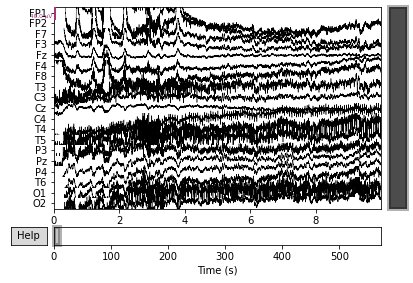

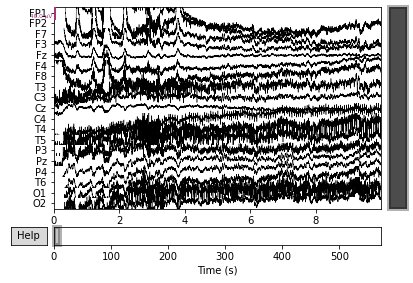

In [78]:
raw.plot()

In [83]:
raw.plot_projs_topomap()

ZeroDivisionError: division by zero